In [107]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style('solarized-light')

In [71]:
df=pd.read_html('http://www.aoml.noaa.gov/hrd/tcfaq/E11.html')

In [72]:
df=df[3].dropna()[:-2].T.set_index(0).T.set_index('Year')
df.head()

,NamedStorms,Hurricanes,MajorHurricanes,ACE
Year,,,,
1851,6,3,1,36
1852,5,5,1,73
1853,8,4,2,76
1854,5,3,1,31
1855,5,4,1,18


In [73]:
dg=pd.read_html('http://www.aoml.noaa.gov/hrd/hurdat/UShurrs_detailed.html')

In [74]:
dg=dg[2].dropna().T.set_index(1).T

In [75]:
ind=[i.replace('$','').replace('*','').replace('#','').replace('%','').replace('&','') for i in np.array(dg[dg.columns[0]])]
ind=[pd.to_datetime(i[i.find('-')+1:]) for i in ind]

In [76]:
dg.index=ind

In [84]:
dg

1,#/Date,Time,Latitude,Longitude,Max Winds (kt),SS HWS,RMWnm,CentralPressure(mb),OCI (mb),Size (nm),States Affected,Storm Names
1851-06-25 00:00:00,1-6/25/1851$,2100Z,28.2N,96.8W,80,1,---,(974),----,---,BTX1,---------------
1851-08-23 00:00:00,4-8/23/1851$,2100Z,30.1N,85.7W,100,3,---,(950),----,---,"AFL3,IGA1","""Great Middle Florida"""
1852-08-22 00:00:00,1-8/22/1852$,1200Z,23.8N,81.1W,90,2,---,(970),----,---,BFL2,---------------
1852-08-26 00:00:00,1-8/26/1852,0600Z,30.2N,88.6W,100,3,10,961,----,---,"AL3,MS3,LA2,AFL1","""Great Mobile"""
1852-09-12 00:00:00,3-9/12/1852$,0000Z,28.0N,82.8W,70,1,---,(982),----,---,BFL1,---------------
1852-10-09 00:00:00,5-10/9/1852$,2100Z,29.9N,84.4W,90,2,---,(965),----,---,"AFL2,IGA1","""Middle Florida"""
1853-10-21 00:00:00,8-10/21/1853*,0600Z,30.9N,80.9W,70,1,---,(965),----,---,GA1,---------------
1854-06-26 00:00:00,1-6/26/1854$,1200Z,26.2N,97.0W,70,1,---,(982),----,---,ATX1,---------------
1854-09-08 00:00:00,3-9/8/1854,2000Z,31.7N,81.1W,100,3,40,950,----,---,"GA3,SC2,DFL1","""Great Carolina"""
1854-09-18 00:00:00,4-9/18/1854,2100Z,28.9N,95.3W,90,2,---,(965),----,---,BTX2,"""Matagorda"""


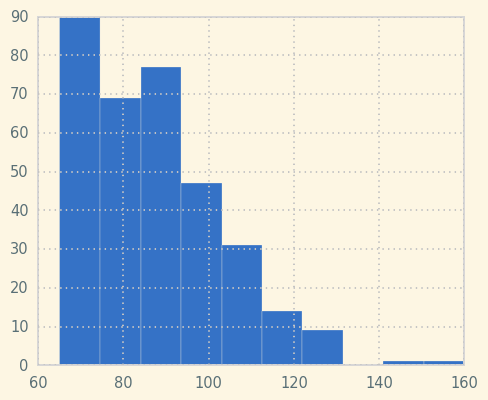

In [108]:
dg['Max Winds (kt)'].astype('float').hist()

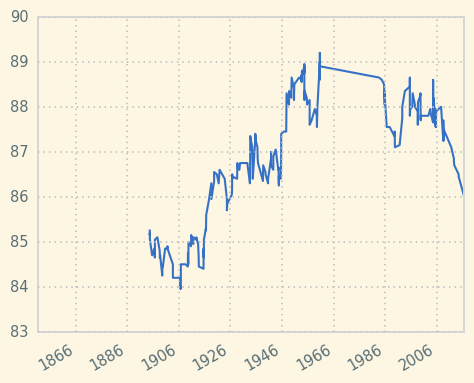

In [109]:
dg['Max Winds (kt)'].astype('float').rolling(100).mean(center=False).plot()

In [117]:
dg['lat']=[float(i.replace('N','')) for i in dg['Latitude'].values]

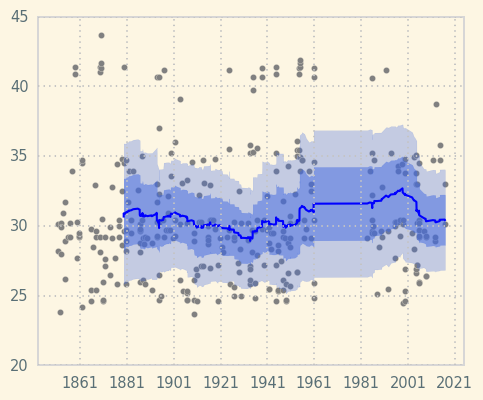

In [145]:
plt.scatter(dg.index,dg['lat'],c='grey')
f=dg['lat'].rolling(60)
plt.fill_between(dg.index,f.mean()-f.std(),f.mean()+f.std(),alpha=0.3,color='royalblue')
plt.fill_between(dg.index,f.mean()-f.std()/2.0,f.mean()+f.std()/2.0,alpha=0.5,color='royalblue')
plt.plot(dg.index,f.mean(),c='blue')

In [186]:
dc=pd.read_html('http://www.wpc.ncep.noaa.gov/tropical/rain/tcmaxima.html')

In [187]:
dc=dc[0].drop(2,axis=1)

In [188]:
from dateutil import parser

In [189]:
ind=[i[i.find('(')+1:i.find(')')] for i in dc[0][1:]]
ind=[parser.parse(i[i.find('-')+1:]) for i in ind]

In [194]:
val=[float(i[:i.find(' ')]) for i in dc[1][1:]]

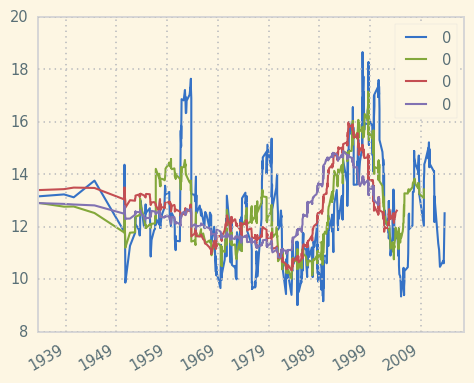

In [215]:
fig,ax=plt.subplots(1,1)
pd.DataFrame(val,index=ind).rolling(20).mean().plot(ax=ax)
pd.DataFrame(val,index=ind).rolling(50).mean().plot(ax=ax)
pd.DataFrame(val,index=ind).rolling(100).mean().plot(ax=ax)
pd.DataFrame(val,index=ind).rolling(150).mean().plot(ax=ax)

In [216]:
w=pd.read_html('https://en.wikipedia.org/wiki/List_of_the_most_intense_tropical_cyclones')

In [227]:
n_atl=w[0].T.set_index(0).T.dropna()

In [228]:
e_pac=w[1].T.set_index(0).T.dropna()

In [229]:
nw_pac=w[2].T.set_index(0).T.dropna()

In [230]:
n_ind=w[3].T.set_index(0).T.dropna()

In [231]:
sw_ind=w[4].T.set_index(0).T.dropna()

In [233]:
aus=w[5].T.set_index(0).T.dropna()

In [235]:
s_pac=w[6].T.set_index(0).T.dropna()

In [238]:
s_atl=w[7].T.set_index(0).T.dropna()

In [240]:
df=[n_atl,s_atl,e_pac,nw_pac,n_ind,sw_ind,aus,s_pac]u'\u2660'u'\xa0'

In [337]:
data=[]
for j in range(7):
    for i in df[j].T.iteritems():
        print i[1][0].replace('"',''),i[1][3][i[1][3].find('hPa')-4:i[1][3].find('hPa')].strip(),
        if u'\u2013' in i[1][1]:
            print i[1][1][:i[1][1].find(u'\u2013')],
        elif u'-' in i[1][1]:
            print i[1][1][:i[1][1].find(u'-')],
        else: print i[1][1],
        k=i[1][2][i[1][2].find('!')+1:i[1][2][i[1][2].find('!')+1:].strip().find(' ')].strip()
        if u'\u2660' in k:
            print k[k.find(u'\u2660')+1:k.find(u'\xa0')]
        else: print k


Mahina 914 1899 205
Joan 915 1975 230
Amy 915 1979 230
Orson 904 1988 250
Graham 915 1991 230
Theodore 910 1993 200
Vance 910 1998 215
Gwenda 900 1998 220
Chris 915 2001 205
Inigo 900 2002 240
Fay 910 2003 215
Floyd 916 2005 195
Glenda 910 2005 205
Monica 916 2005 250
George 902 2006 205
Ita 922 2013 220
Ernie 922 2016 220
